In [1]:
!pip install xlrd                      # excel read
import pandas as pd                    # data processing 
import numpy as np
import seaborn as sn                   # for correlation matrix
import matplotlib.pyplot as plt        # for plots

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, classification_report,roc_auc_score,plot_confusion_matrix

# 1. Exploratory Data Analysis

In [2]:
df = pd.read_excel('/home/jovyan/CTG_1.xls', sheet_name = 'Raw Data')  # Importing original CTG dataset
df

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,S8001045.dsp,1998-06-06,CTG2127.txt,1576.0,3049.0,140.0,140.0,1.0,0.0,9.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2126,S8001045.dsp,1998-06-06,CTG2128.txt,2796.0,3415.0,142.0,142.0,1.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2127,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2128,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The raw dataset has 2,126 rows and 40 columns.

#### Dropping unnecessary columns.
Dropping columns that do not contribute to the prediction of the class. They have been selected based on domain knowledge.
Columns such as "FileName","Date","SegFile","b","e" are particularly not useful to the classification objective and are unique case to case.

In [3]:
df = df.drop(columns = ["FileName","Date","SegFile","b","e","A", "B","C", "D" ,"E", "AD", "DE" ,"LD", "FS", "SUSP","CLASS","DR","LBE"])  # Dropping columns
df

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
2,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
3,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
4,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,140.0,1.0,0.0,9.0,78.0,0.4,27.0,7.0,0.0,0.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0
2126,142.0,1.0,1.0,5.0,74.0,0.4,36.0,5.0,0.0,0.0,...,117.0,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0,1.0
2127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130 entries, 0 to 2129
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2127 non-null   float64
 3   UC        2127 non-null   float64
 4   ASTV      2127 non-null   float64
 5   MSTV      2127 non-null   float64
 6   ALTV      2127 non-null   float64
 7   MLTV      2127 non-null   float64
 8   DL        2128 non-null   float64
 9   DS        2128 non-null   float64
 10  DP        2128 non-null   float64
 11  Width     2126 non-null   float64
 12  Min       2126 non-null   float64
 13  Max       2126 non-null   float64
 14  Nmax      2126 non-null   float64
 15  Nzeros    2126 non-null   float64
 16  Mode      2126 non-null   float64
 17  Mean      2126 non-null   float64
 18  Median    2126 non-null   float64
 19  Variance  2126 non-null   float64
 20  Tendency  2126 non-null   floa

#### Null values

There are some calculations in the raw data file that make the columns to have null values. I will drop the last 3 rows.
There is also an empty row between the headings and the data, to be dropped too.

In [5]:
df.isna().sum()

LB          4
AC          4
FM          3
UC          3
ASTV        3
MSTV        3
ALTV        3
MLTV        3
DL          2
DS          2
DP          2
Width       4
Min         4
Max         4
Nmax        4
Nzeros      4
Mode        4
Mean        4
Median      4
Variance    4
Tendency    4
NSP         4
dtype: int64

#### Dropping first and last 3 rows.

In [6]:
df.drop(df.tail(3).index,inplace=True)   # Drops first three rows
df.drop(df.head(1).index,inplace=True)   # Drops last row
df

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
1,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
2,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
3,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
4,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
5,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,140.0,0.0,0.0,6.0,79.0,0.2,25.0,7.2,0.0,0.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2123,140.0,1.0,0.0,9.0,78.0,0.4,22.0,7.1,0.0,0.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2124,140.0,1.0,0.0,7.0,79.0,0.4,20.0,6.1,0.0,0.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2125,140.0,1.0,0.0,9.0,78.0,0.4,27.0,7.0,0.0,0.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2126 entries, 1 to 2126
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   ASTV      2126 non-null   float64
 5   MSTV      2126 non-null   float64
 6   ALTV      2126 non-null   float64
 7   MLTV      2126 non-null   float64
 8   DL        2126 non-null   float64
 9   DS        2126 non-null   float64
 10  DP        2126 non-null   float64
 11  Width     2126 non-null   float64
 12  Min       2126 non-null   float64
 13  Max       2126 non-null   float64
 14  Nmax      2126 non-null   float64
 15  Nzeros    2126 non-null   float64
 16  Mode      2126 non-null   float64
 17  Mean      2126 non-null   float64
 18  Median    2126 non-null   float64
 19  Variance  2126 non-null   float64
 20  Tendency  2126 non-null   floa

In [8]:
df.isna().sum()  # Checking missing values

LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
NSP         0
dtype: int64

Now the dataset has no null values.

### Statistical summary

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LB,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.0,160.0
AC,2126.0,2.722484,3.560850,0.0,0.0,1.0,4.0,26.0
FM,2126.0,7.241298,37.125309,0.0,0.0,0.0,2.0,564.0
UC,2126.0,3.659925,2.847094,0.0,1.0,3.0,5.0,23.0
ASTV,2126.0,46.990122,17.192814,12.0,32.0,49.0,61.0,87.0
MSTV,2126.0,1.332785,0.883241,0.2,0.7,1.2,1.7,7.0
ALTV,2126.0,9.846660,18.396880,0.0,0.0,0.0,11.0,91.0
MLTV,2126.0,8.187629,5.628247,0.0,4.6,7.4,10.8,50.7
DL,2126.0,1.570085,2.499229,0.0,0.0,0.0,3.0,16.0
DS,2126.0,0.003293,0.057300,0.0,0.0,0.0,0.0,1.0


### Histograms of Features

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


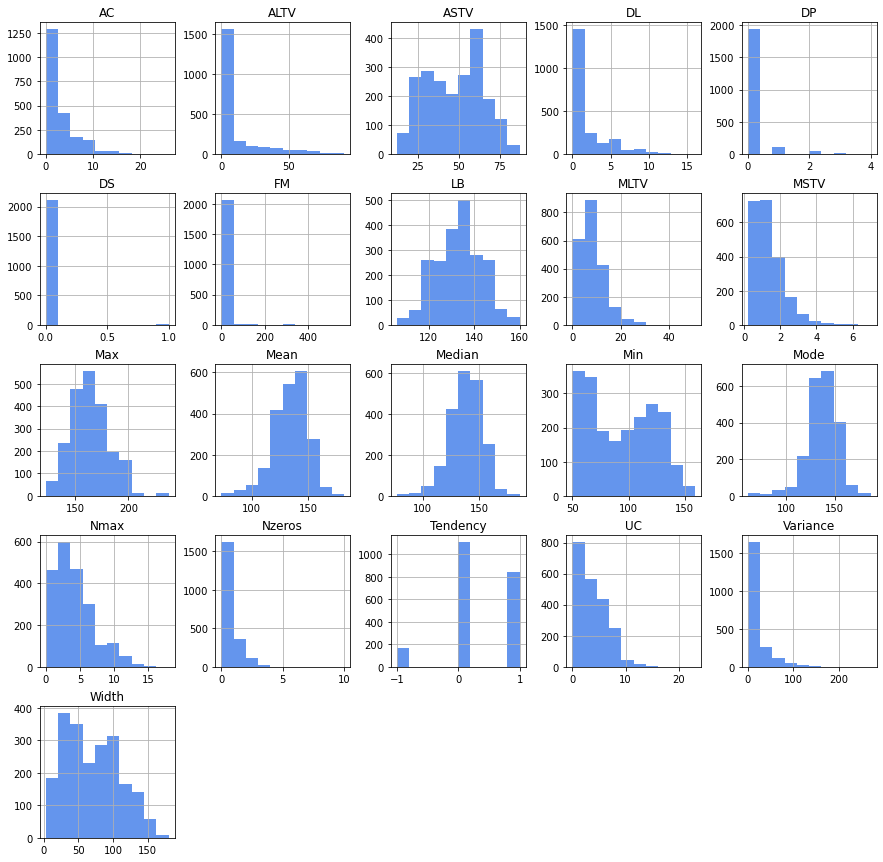

In [10]:
df_X = df.drop(columns=['NSP'])
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
df_X.hist(ax=ax, color = 'cornflowerblue')
plt.show()

### Classes distribution

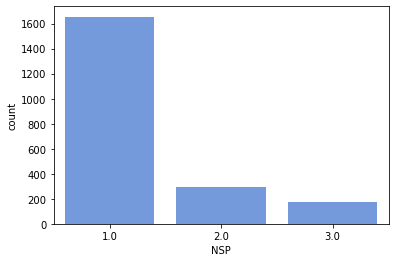

In [11]:
sn.countplot(x='NSP',data=df, color = 'cornflowerblue')

Class 1 (Normal) represent the 78% of the instances, while class 2 (Suspect) and class 3 (Pathological) represent the 14% and 8% respectively.

#### Boxplot for features

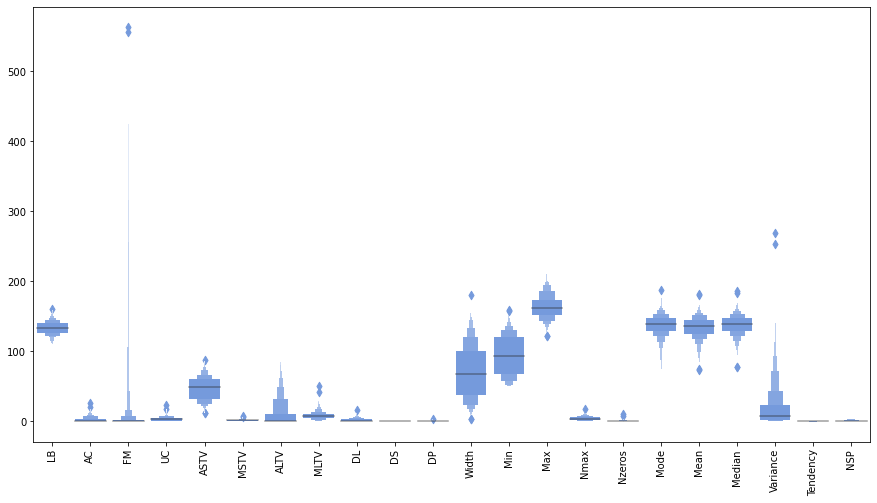

In [31]:
plt.figure(figsize=(15,8))
sn.boxenplot(data = df,color = "cornflowerblue")
plt.xticks(rotation=90)
plt.show()

### Standardizing attributes measurements
The following attributes are measured per second. These will be converted to a 'by minute' measure in order to create the correlation matrix.

In [12]:
# Note that the following attributes represent rates that measure units per second:
#AC, FM, UC, DL, DS and DP
#The values of these attributes will be transformed in order to get the average per minute measurements 
#and compare with other attributes that are measured originally per minute. 

df['AC'] = df['AC']*60
df['FM'] = df['FM']*60
df['UC'] = df['UC']*60
df['DL'] = df['DL']*60
df['DS'] = df['DS']*60
df['DP'] = df['DP']*60
df

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
1,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
2,132.0,240.0,0.0,240.0,17.0,2.1,0.0,10.4,120.0,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
3,133.0,120.0,0.0,300.0,16.0,2.1,0.0,13.4,120.0,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
4,134.0,120.0,0.0,360.0,16.0,2.4,0.0,23.0,120.0,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
5,132.0,240.0,0.0,300.0,16.0,2.4,0.0,19.9,0.0,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,140.0,0.0,0.0,360.0,79.0,0.2,25.0,7.2,0.0,0.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2123,140.0,60.0,0.0,540.0,78.0,0.4,22.0,7.1,0.0,0.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2124,140.0,60.0,0.0,420.0,79.0,0.4,20.0,6.1,0.0,0.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2125,140.0,60.0,0.0,540.0,78.0,0.4,27.0,7.0,0.0,0.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


### Correlation Matrix

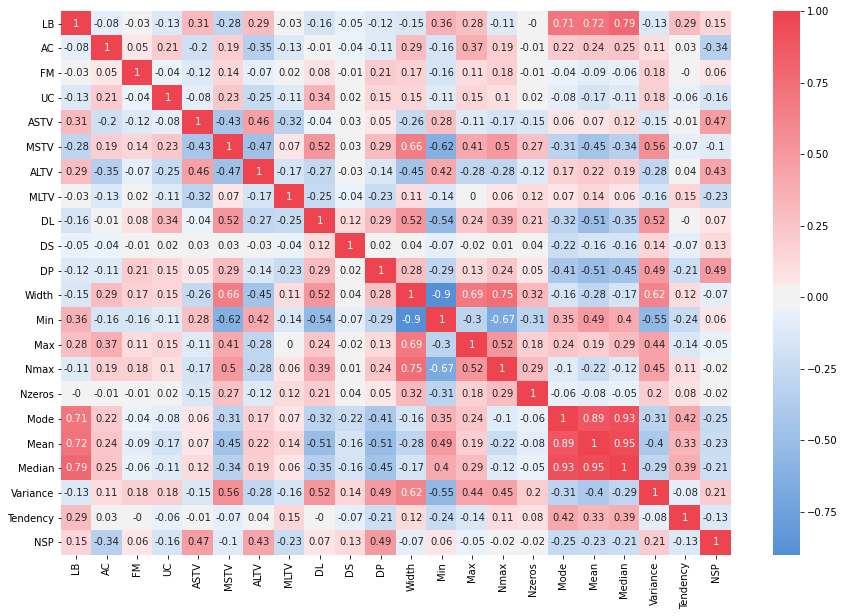

In [15]:
corrmat= df.corr()
corrmat = corrmat.round(decimals=2)
plt.figure(figsize=(15,10))  
cmap = sn.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sn.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [16]:
df.to_csv('CTG_clean.csv', index=False)  # saving clean and rescaled (converted to "per minute") dataset into a csv file

In [17]:
df

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
1,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
2,132.0,240.0,0.0,240.0,17.0,2.1,0.0,10.4,120.0,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
3,133.0,120.0,0.0,300.0,16.0,2.1,0.0,13.4,120.0,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
4,134.0,120.0,0.0,360.0,16.0,2.4,0.0,23.0,120.0,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
5,132.0,240.0,0.0,300.0,16.0,2.4,0.0,19.9,0.0,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,140.0,0.0,0.0,360.0,79.0,0.2,25.0,7.2,0.0,0.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2123,140.0,60.0,0.0,540.0,78.0,0.4,22.0,7.1,0.0,0.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2124,140.0,60.0,0.0,420.0,79.0,0.4,20.0,6.1,0.0,0.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2125,140.0,60.0,0.0,540.0,78.0,0.4,27.0,7.0,0.0,0.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0
